## Homework 1

first download the data - 
you can just download it manually from the link, or use wget
be careful - don't unzip it locally and try to upload to colab - there are 10,000 files in the folder it will take forever to upload. first upload the zip to colab, then unzip.

In [3]:
!wget https://www.dropbox.com/s/apl6g5g9svhnfyg/Dataset.zip

--2021-05-04 05:27:55--  https://www.dropbox.com/s/apl6g5g9svhnfyg/Dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/apl6g5g9svhnfyg/Dataset.zip [following]
--2021-05-04 05:27:56--  https://www.dropbox.com/s/raw/apl6g5g9svhnfyg/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucde90e45f5d844f9ee677551229.dl-eu.dropboxusercontent.com/cd/0/inline/BN3g_cCmuV2JshU6O61CC7AuArEYwCStQiZp1ZWYrzDr7KN2laqAJe05iHBB3KTGNnhnGmu1IRkPbjCgTvZywpXqNV6rzK2b9XMyIKjxPOtz5vjLT9tKeifv4IKWh6lJJ-BsN0TC8jWwavv9IsWU2ky8/file# [following]
--2021-05-04 05:27:56--  https://ucde90e45f5d844f9ee677551229.dl-eu.dropboxusercontent.com/cd/0/inline/BN3g_cCmuV2JshU6O61CC7AuArEYwCStQiZp1ZWYrzDr7KN2laqAJe05iHBB3KTGNnhnGmu1IRkPbjCgTvZywpX

In [4]:
!unzip Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/validation/class1_4835.png  
  inflating: Dataset/validation/class2_4133.png  
  inflating: Dataset/validation/class3_1739.png  
  inflating: Dataset/validation/class2_279.png  
  inflating: Dataset/validation/class2_4655.png  
  inflating: Dataset/validation/class0_2288.png  
  inflating: Dataset/validation/class0_4821.png  
  inflating: Dataset/validation/class0_1781.png  
  inflating: Dataset/validation/class3_3890.png  
  inflating: Dataset/validation/class1_3828.png  
  inflating: Dataset/validation/class2_4899.png  
  inflating: Dataset/validation/class2_3648.png  
  inflating: Dataset/validation/class2_4127.png  
  inflating: Dataset/validation/class1_5.png  
  inflating: Dataset/validation/class4_2725.png  
  inflating: Dataset/validation/class4_2043.png  
  inflating: Dataset/validation/class0_1965.png  
  inflating: Dataset/validation/class2_2218.png  
  inflating: Dataset/validation/class2_245.png  
  in

in this homework you will build a classifier for the galaxy10 dataset (https://astronn.readthedocs.io/en/latest/galaxy10.html)

but its a "special" version of the dataset created for this homework. The images have been converted to grayscale, and saved as png files in two directories, "train" and "validation". There is a seperate test dataset in a secret location, you will train a model, submit it, and we will evaluate it on the test dataset

![image.png](attachment:image.png)

In [5]:
path_to_training_data = 'Dataset/train/'
path_to_validation_data = 'Dataset/validation/'

In [6]:
#first we get a list of the files in the directory

import glob
#glob gives you a list of file paths to the images
filelist = glob.glob(path_to_training_data+'/*.png')

#print the first 10 entries:
filelist[:10]

['Dataset/train/class1_2609.png',
 'Dataset/train/class1_6021.png',
 'Dataset/train/class1_7102.png',
 'Dataset/train/class6_7683.png',
 'Dataset/train/class1_2655.png',
 'Dataset/train/class2_1100.png',
 'Dataset/train/class3_1796.png',
 'Dataset/train/class2_7963.png',
 'Dataset/train/class1_8802.png',
 'Dataset/train/class2_8445.png']

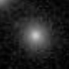

In [7]:
#to load a single image, use the PIL (python image library) function Image
from PIL import Image

Image.open(filelist[2])

In [8]:
#we want to turn it into a pytorch tensor, 
#and flatten it (since we want to train a fully connceted network)
from torchvision import datasets, transforms

img = Image.open(filelist[0])

transforms.ToTensor()( img )

tensor([[[0.0039, 0.0196, 0.0314,  ..., 0.0510, 0.0275, 0.0118],
         [0.0078, 0.0157, 0.0196,  ..., 0.0706, 0.0431, 0.0078],
         [0.0000, 0.0039, 0.0118,  ..., 0.1373, 0.0510, 0.0157],
         ...,
         [0.0000, 0.0078, 0.0157,  ..., 0.0078, 0.0118, 0.0157],
         [0.0039, 0.0196, 0.0235,  ..., 0.0078, 0.0118, 0.0196],
         [0.0157, 0.0275, 0.0196,  ..., 0.0314, 0.0235, 0.0157]]])

In [9]:
transforms.ToTensor()( img ).view(-1)

tensor([0.0039, 0.0196, 0.0314,  ..., 0.0314, 0.0235, 0.0157])

In [10]:
#to determine the class label of an image, just look at its name:

filelist[:5]

['Dataset/train/class1_2609.png',
 'Dataset/train/class1_6021.png',
 'Dataset/train/class1_7102.png',
 'Dataset/train/class6_7683.png',
 'Dataset/train/class1_2655.png']

In [12]:
## we generate numerical labels based on the file name
import torch
import numpy as np

labels = np.zeros(len(filelist))

for class_i in range(10):
    files_that_are_of_this_class = ['class'+str(class_i) in x for x in filelist]
    labels[ files_that_are_of_this_class ] = class_i
    
#the labels need to be converted to torch.LongTensor for multi-class classification
#see the documentation at https://pytorch.org/docs/stable/nn.html#crossentropyloss
labels = torch.LongTensor(labels)

labels

tensor([1, 1, 1,  ..., 1, 2, 2])

### activate autoreload so any changes you make to dataloader.py, model.py are automatically imported

In [13]:
%load_ext autoreload
%autoreload 2

## now, write a custom dataloader for the dataset 



In [14]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from torchvision import datasets, transforms
from PIL import Image
import glob



class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(69*69,400)
        self.activation1= nn.ReLU()
        self.layer2 = nn.Linear(400,500)
        self.activation2= nn.ReLU()
        self.layer3 = nn.Linear(500,10)
    def forward(self,x):
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation2(out)
        out = self.layer3(out)
        return out
    
class CustomDataset(Dataset):
    def __init__(self, path,n_classes=10,transform=False):
        
         
        self.transform = transform
        
        self.filelist = glob.glob(path+'/*.png') 
  
        labels = np.zeros(len(self.filelist))
        for class_i in range(10):
                files_that_are_of_this_class = ['class'+str(class_i) in x for x in self.filelist]
                labels[ files_that_are_of_this_class ] = class_i
        labels = torch.LongTensor(labels)
        self.labels =  labels


    def __len__(self):
       
        return len(self.filelist)


    def __getitem__(self, idx):
        
        img = Image.open(self.filelist[idx])
        if self.transform:
          img = transforms.RandomRotation(180)( img )
        x = transforms.ToTensor()( img ).view(-1)
        
        
        y = self.labels[idx]
    
        return x, y

## you should get something that works like this:

In [15]:
training_ds = CustomDataset(path_to_training_data,transform=True)
validation_ds = CustomDataset(path_to_validation_data)


some_random_idx = 52
training_ds[some_random_idx]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(1))

## now create the data loaders, and set the batch size. 
remember to shuffle the training dataset

In [16]:
from torch.utils.data import Dataset, DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [17]:
for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 4761]) torch.Size([300])


## lets plot some examples from each class

this should work if your dataloader is implemented properly

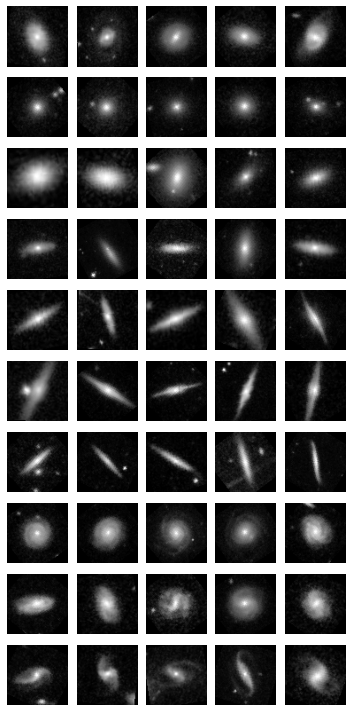

In [18]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(10,5,figsize=(5,10))


for class_i in range(10):
    idxs = np.where( training_ds.labels == class_i )[0]
    idxs = np.random.permutation(idxs)
    for plot_i in range(np.min([5,len(idxs)])):

        ax[class_i][plot_i].imshow(training_ds[idxs[plot_i]][0].reshape(69,69),cmap='gray')
        ax[class_i][plot_i].set_axis_off()
        
plt.tight_layout()
plt.show()

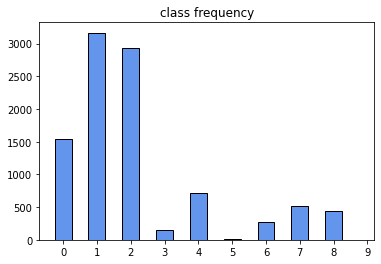

In [19]:
plt.hist(training_ds.labels.data.numpy(),bins=np.linspace(0,9,19)-0.25,color='cornflowerblue',ec='k')
plt.xticks(np.arange(10))
plt.title('class frequency')
plt.show()

# Now lets build the neural network

its a classifier - it takes as input 69*69 numbers, and outputs 10 numbers

In [ ]:
from model import Net

ModuleNotFoundError: ignored

In [20]:
net = Net()

## check your model takes the input and returns the right shape for the output.
should be (Batch size, 10) for the 10 classes

In [21]:
for x,y in training_dataloader:
    print(x.shape,net(x).shape,y.shape)
    break

torch.Size([300, 4761]) torch.Size([300, 10]) torch.Size([300])


## the training:


In [22]:
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

In [23]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x)
            
            loss+= loss_func(pred,y).item()
            
            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)
    loss = loss/n_batches      
    return correct/total, loss

In [24]:
compute_accuracy_and_loss(training_dataloader,net)

(0.0937, 2.2912205036948707)

In [ ]:
from tqdm import tqdm
n_epochs = 50


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 
for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
    
    net.train() # put the net into "training mode"
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
    
        optimizer.zero_grad()
        output = net(x)
        loss = loss_func(output,y)
        loss.backward()  
        optimizer.step()
    
    net.eval() #put the net into evaluation mode
    
    
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append( train_loss)    
    training_acc_vs_epoch.append( train_acc )
    
    validation_acc_vs_epoch.append(valid_acc)
    
    validation_loss_vs_epoch.append(valid_loss)
    #save the model if the validation loss has decreased
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
        torch.save(net.state_dict(), 'trained_model.pt')
    
    
    









  0%|          | 0/50 [00:00<?, ?it/s]







  2%|▏         | 1/50 [00:10<08:47, 10.77s/it]







  4%|▍         | 2/50 [00:21<08:33, 10.70s/it]







val acc:0.45680, train acc:0.45850:   4%|▍         | 2/50 [00:21<08:33, 10.70s/it]







val acc:0.45680, train acc:0.45850:   6%|▌         | 3/50 [00:31<08:22, 10.68s/it]







val acc:0.50660, train acc:0.51070:   6%|▌         | 3/50 [00:31<08:22, 10.68s/it]







val acc:0.50660, train acc:0.51070:   8%|▊         | 4/50 [00:42<08:09, 10.65s/it]







val acc:0.59660, train acc:0.60130:   8%|▊         | 4/50 [00:42<08:09, 10.65s/it]







val acc:0.59660, train acc:0.60130:  10%|█         | 5/50 [00:53<07:58, 10.64s/it]







val acc:0.60580, train acc:0.61930:  10%|█         | 5/50 [00:53<07:58, 10.64s/it]







val acc:0.60580, train acc:0.61930:  12%|█▏        | 6/50 [01:03<07:45, 10.59s/it]







val acc:0.61420, train acc:0.62960:  12%|█▏        | 6/50 [01:03<07:45, 10.59s/it]







val acc:0.61420, train acc:0

In [ ]:
compute_accuracy_and_loss(valid_dataloader,net)

(0.6324, 1.33538159903358)

### fill out the missing parts of the training loop

remember, you need to zero the gradient, compute the loss, compute the gradient, then tell the optimizer to take a "step". when looping over the validation dataset you don't need to compute the loss and you don't need the optimizer - just compute the loss to see when to save your model.

In [ ]:
if torch.cuda.is_available():
    net.cuda()

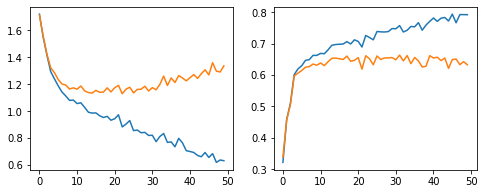

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()

### optional: add data augmentation


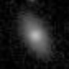

In [25]:
img = Image.open(filelist[443])
img

In [26]:
net = Net()
print(compute_accuracy_and_loss(training_dataloader,net))
training_ds2 = CustomDataset(path_to_training_data,transform=True)
training_dataloader2 = DataLoader(training_ds2,batch_size=300,shuffle=True)

(0.2858, 2.2854334115982056)


In [27]:
from tqdm import tqdm
n_epochs = 50


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 
for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
    
    net.train() # put the net into "training mode"
    for x,y in training_dataloader2:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
    
        optimizer.zero_grad()
        output = net(x)
        loss = loss_func(output,y)
        loss.backward()  
        optimizer.step()
    
    net.eval() #put the net into evaluation mode
    
    
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append( train_loss)    
    training_acc_vs_epoch.append( train_acc )
    
    validation_acc_vs_epoch.append(valid_acc)
    
    validation_loss_vs_epoch.append(valid_loss)
    #save the model if the validation loss has decreased
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
        torch.save(net.state_dict(), 'trained_model2.pt')
    

val acc:0.71140, train acc:0.71630: 100%|██████████| 50/50 [12:41<00:00, 15.23s/it]


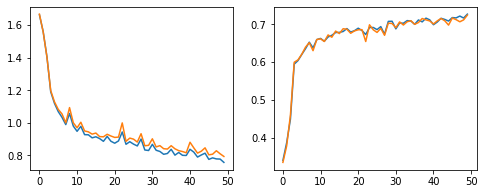

In [28]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch)
ax[1].plot(validation_acc_vs_epoch)

plt.show()